# Importing libraries

In [17]:
import numpy as np
import os
from pathlib import Path
import matplotlib.pyplot as plt
from keras.preprocessing import image
import pandas as pd

# Dataset import

### DATASET LINK : https://www.kaggle.com/thedagger/pokemon-generation-one`

In [18]:
p = Path("../../Downloads/Train/Images/")
#dirs = p.glob('*')

labels_dict = {
    "Pikachu":0,
    "Bulbasaur":1,
    "Charmander":2
}

ds = pd.read_csv("C:/Users/TARUN KUMAR/Downloads/Train/train.csv")
ds = ds.values

# dicto
dicto = {}
for i in ds:
    dicto[i[0]]=labels_dict[i[1]]
    
    
image_data = []
labels = []

for img_path in p.glob("*.jpg"):
    label = str(img_path).split("\\")[-1]
    img = image.load_img(img_path,target_size=(32,32))
    img_array = image.img_to_array(img)
    image_data.append(img_array)
    print(label)
    labels.append(dicto[label])

296.jpg
297.jpg
298.jpg
299.jpg
300.jpg
301.jpg
302.jpg
303.jpg
304.jpg
305.jpg
306.jpg
307.jpg
308.jpg
309.jpg
310.jpg
311.jpg
312.jpg
313.jpg
314.jpg
315.jpg
316.jpg
317.jpg
318.jpg
319.jpg
320.jpg
321.jpg
322.jpg
323.jpg
324.jpg
325.jpg
326.jpg
327.jpg
328.jpg
329.jpg
330.jpg
331.jpg
332.jpg
333.jpg
334.jpg
335.jpg
336.jpg
337.jpg
338.jpg
339.jpg
340.jpg
341.jpg
342.jpg
343.jpg
344.jpg
345.jpg
346.jpg
347.jpg
348.jpg
349.jpg
350.jpg
351.jpg
352.jpg
353.jpg
354.jpg
355.jpg
356.jpg
357.jpg
358.jpg
359.jpg
360.jpg
361.jpg
362.jpg
363.jpg
364.jpg
365.jpg
366.jpg
367.jpg
368.jpg
369.jpg
370.jpg
371.jpg
372.jpg
373.jpg
374.jpg
375.jpg
376.jpg
377.jpg
378.jpg
379.jpg
380.jpg
381.jpg
382.jpg
383.jpg
384.jpg
385.jpg
386.jpg
387.jpg
388.jpg
389.jpg
390.jpg
391.jpg
392.jpg
393.jpg
394.jpg
395.jpg
396.jpg
397.jpg
398.jpg
399.jpg
400.jpg
401.jpg
402.jpg
403.jpg
404.jpg
405.jpg
406.jpg
407.jpg
408.jpg
409.jpg
410.jpg
411.jpg
412.jpg
413.jpg
414.jpg
415.jpg
416.jpg
417.jpg
418.jpg
419.jpg
420.jpg


c:\users\tarun kumar\appdata\local\programs\python\python37\lib\site-packages\PIL\Image.py:963: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


526.jpg
527.jpg
528.jpg
529.jpg
530.jpg
531.jpg
532.jpg
533.jpg
534.jpg
535.jpg
536.jpg
537.jpg
538.jpg
539.jpg
540.jpg
541.jpg
542.jpg
543.jpg
544.jpg
545.jpg
546.jpg
547.jpg
548.jpg
549.jpg
550.jpg
551.jpg
552.jpg
553.jpg
554.jpg
555.jpg
556.jpg
557.jpg
558.jpg
559.jpg
560.jpg
561.jpg
562.jpg
563.jpg
564.jpg
565.jpg
566.jpg
567.jpg
568.jpg
569.jpg
570.jpg
571.jpg
572.jpg
573.jpg
574.jpg
575.jpg
576.jpg
577.jpg
578.jpg
579.jpg
580.jpg
581.jpg
582.jpg
583.jpg
584.jpg
585.jpg
586.jpg
587.jpg
588.jpg
589.jpg
590.jpg
591.jpg
592.jpg
593.jpg
594.jpg
595.jpg
596.jpg
597.jpg
598.jpg
599.jpg
600.jpg
601.jpg
602.jpg
603.jpg
604.jpg
605.jpg
606.jpg
607.jpg
608.jpg
609.jpg
610.jpg
611.jpg
612.jpg
613.jpg
614.jpg
615.jpg
616.jpg
617.jpg
618.jpg
619.jpg
620.jpg


In [19]:
print(type(ds))

<class 'numpy.ndarray'>


In [20]:
print(len(image_data),len(labels))

304 304


In [21]:
image_data = np.array(image_data,dtype='float32')/255.0
labels = np.array(labels)
print(image_data.shape,labels.shape)


(304, 32, 32, 3) (304,)


In [22]:
class SVM:
    def __init__(self,C=1.0):
        self.C = C
        self.W = 0
        self.b = 0
        
    def hingeLoss(self,W,b,X,Y):
        loss = 0.0
        loss += .5*np.dot(W,W.T)
        
        m = X.shape[0]
        for i in range(m):
            ti = Y[i]*(np.dot(W,X[i].T)+b)
            loss += self.C *max(0,(1-ti))
        return loss[0][0]
    
    def fit(self,X,Y,batch_size=50,learning_rate=0.001,maxitr=300):
        no_of_samples = X.shape[0]
        no_of_features = X.shape[1]
        
        n = learning_rate
        c = self.C
        # INIT the model parameters
        W = np.zeros((1,no_of_features))
        bais = 0
        # Print intial loss
       # print(self.hingeLoss(w,bais,X,Y))
        # training from here
        # we upadte W and B acc...
        losses = []
        for i in range(maxitr):
            # training loop for parameters
            l = self.hingeLoss(W,bais,X,Y)
            losses.append(l)
            ids = np.arange(no_of_samples)
            np.random.shuffle(ids)
            
            # we will do batch gradient descent with random shuffling
            for batch_start in range(0,no_of_samples,batch_size):
                gradw=0
                gradb=0
                # iterate over all examples in small batch
                for j in range(batch_start,batch_start+batch_size):
                    if j < no_of_samples:
                        i = ids[j]
                        ti = Y[i]*(np.dot(W,X[i].T)+bais)
                        
                        if ti>1:
                            gradb += 0
                            gradw += 0
                        else:
                            gradw += c*Y[i]*X[i]
                            gradb += c*Y[i]
                # update parameters(Gradient for batch is ready)
                W = W - n*W + n*gradw
                bais = bais + n*gradb
        self.W = W
        self.b = bais
        return W,bais,losses

In [23]:
M = image_data.shape[0]
image_data = image_data.reshape(M,-1)
print(image_data.shape)
print(labels.shape)

(304, 3072)
(304,)


In [24]:
CLASSES = len(np.unique(labels))
print(CLASSES)

3


In [25]:
def ClassWiseData(x,y):
    data = {}
    
    for i in range(CLASSES):
        data[i] = []
    
    for i in range(x.shape[0]):
        data[y[i]].append(x[i])
        
    for k in data.keys():
        data[k] = np.array(data[k]) 
    return data

In [26]:
data = ClassWiseData(image_data,labels)

In [27]:
print(data[0].shape)
print(data[1].shape)

(101, 3072)
(101, 3072)


In [28]:
def getDataPairForSvm(d1,d2):
    l1 = d1.shape[0]
    l2 = d2.shape[0]
    
    samples = l1+l2
    features = d1.shape[1]
    
    data_pair = np.zeros((samples,features))
    data_labels = np.zeros((samples,))
    
    data_pair[:l1,:] = d1
    data_pair[l1:,:] = d2
    
    data_labels[:l1] = -1
    data_labels[l1:] = +1
    return data_pair,data_labels

In [29]:
mySVM = SVM()
def trainSvm(x,y):
    svm_classifiers = {}
    for i in range(CLASSES):
        svm_classifiers[i] = {}
        for j in range(i+1,CLASSES):
            xpair,ypair = getDataPairForSvm(data[i],data[j])
            # we have to keep learning rate less bcoz loss func is not converging
            wts,b,loss = mySVM.fit(xpair,ypair,learning_rate=0.00001,maxitr=1000)
            svm_classifiers[i][j] = (wts,b)
            # plot loss
            plt.plot(loss)
            plt.show()
    return svm_classifiers

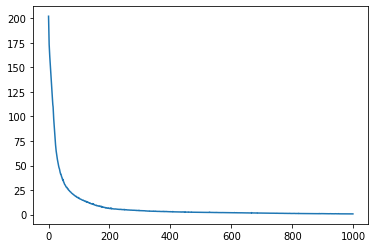

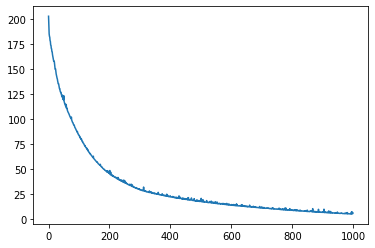

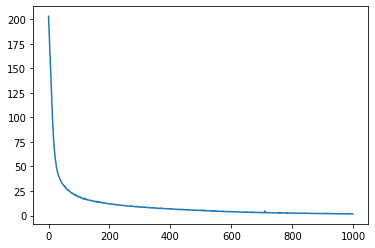

In [30]:
svm_classifiers=trainSvm(image_data,labels)

In [31]:
print(image_data.shape)
def binaryPredict(x,w,b):
    x = np.dot(x,w.T) + b
    if x>=0:
        return 1
    else:
        return -1

(304, 3072)


In [32]:
def predict(x):
    count = np.zeros((CLASSES,))
    
    for i in range(CLASSES):
        for j in range(i+1,CLASSES):
            w,b = svm_classifiers[i][j]
            #Take a majority prediction
            z = binaryPredict(x,w,b)
            
            if(z==1):
                count[j] += 1
            else:
                count[i] += 1
    final_prediction = np.argmax(count)
    #print(count)
    return final_prediction

### TEST DATA

In [33]:
p = Path("../../Downloads/Test/Images/")
test_data = []
test_labels = []
for img_path in p.glob("*.jpg"):
    label = str(img_path).split("\\")[-1]
    print(img_path)
    img = image.load_img(img_path,target_size=(32,32))
    img_array = image.img_to_array(img)
    test_labels.append(label)
    test_data.append(img_array)


print(len(test_data))
test_data = np.array(test_data,dtype='float32')/255.0
M = test_data.shape[0]
test_data = test_data.reshape(M,-1)

..\..\Downloads\Test\Images\1100.jpg
..\..\Downloads\Test\Images\1101.jpg
..\..\Downloads\Test\Images\1102.jpg
..\..\Downloads\Test\Images\1103.jpg
..\..\Downloads\Test\Images\1104.jpg
..\..\Downloads\Test\Images\1105.jpg
..\..\Downloads\Test\Images\1106.jpg
..\..\Downloads\Test\Images\1107.jpg
..\..\Downloads\Test\Images\1108.jpg
..\..\Downloads\Test\Images\1109.jpg
..\..\Downloads\Test\Images\1110.jpg
..\..\Downloads\Test\Images\1111.jpg
..\..\Downloads\Test\Images\1112.jpg
..\..\Downloads\Test\Images\1113.jpg
..\..\Downloads\Test\Images\1114.jpg
..\..\Downloads\Test\Images\1115.jpg
..\..\Downloads\Test\Images\1116.jpg
..\..\Downloads\Test\Images\1117.jpg
..\..\Downloads\Test\Images\1118.jpg
..\..\Downloads\Test\Images\1119.jpg
..\..\Downloads\Test\Images\1120.jpg
..\..\Downloads\Test\Images\1121.jpg
..\..\Downloads\Test\Images\1122.jpg
..\..\Downloads\Test\Images\1123.jpg
..\..\Downloads\Test\Images\1124.jpg
..\..\Downloads\Test\Images\1125.jpg
..\..\Downloads\Test\Images\1126.jpg
.

In [34]:
print(test_data.shape)
ans = []

for i in test_data:
    res=predict(i)
    ans.append(res)

(123, 3072)


In [37]:
res = []
print(ans)
for i in ans:
    if i==0:
        res.append("Pikachu")
    if i==1:
        res.append( "Bulbasaur")
    if i==2:
        res.append("Charmander")

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [38]:
print(test_labels)

['1100.jpg', '1101.jpg', '1102.jpg', '1103.jpg', '1104.jpg', '1105.jpg', '1106.jpg', '1107.jpg', '1108.jpg', '1109.jpg', '1110.jpg', '1111.jpg', '1112.jpg', '1113.jpg', '1114.jpg', '1115.jpg', '1116.jpg', '1117.jpg', '1118.jpg', '1119.jpg', '1120.jpg', '1121.jpg', '1122.jpg', '1123.jpg', '1124.jpg', '1125.jpg', '1126.jpg', '1127.jpg', '1128.jpg', '1129.jpg', '1130.jpg', '1131.jpg', '1132.jpg', '1133.jpg', '1134.jpg', '1135.jpg', '1136.jpg', '1137.jpg', '1138.jpg', '1139.jpg', '1140.jpg', '2000.jpg', '2001.jpg', '2002.jpg', '2003.jpg', '2004.jpg', '2005.jpg', '2006.jpg', '2007.jpg', '2008.jpg', '2009.jpg', '2010.jpg', '2011.jpg', '2012.jpg', '2013.jpg', '2014.jpg', '2015.jpg', '2016.jpg', '2017.jpg', '2018.jpg', '2019.jpg', '2020.jpg', '2021.jpg', '2022.jpg', '2023.jpg', '2024.jpg', '2025.jpg', '2026.jpg', '2027.jpg', '2028.jpg', '2029.jpg', '2030.jpg', '2031.jpg', '2032.jpg', '2033.jpg', '2034.jpg', '2035.jpg', '2036.jpg', '2037.jpg', '2038.jpg', '2039.jpg', '2040.jpg', '2200.jpg', '22

In [72]:
test_labels = np.array(test_labels)
res = np.array(res)
data = {'ImageId':test_labels,'NameOfPokemon':res}
ds=pd.DataFrame(data=data)

,ImageId,NameOfPokemon
0,1100.jpg,Bulbasaur
1,1101.jpg,Bulbasaur
2,1102.jpg,Bulbasaur
3,1103.jpg,Bulbasaur
4,1104.jpg,Bulbasaur
...,...,...
118,2236.jpg,Charmander
119,2237.jpg,Charmander
120,2238.jpg,Charmander
121,2239.jpg,Charmander


In [69]:
### import test set

In [76]:
test_cv = pd.read_csv("C:/Users/TARUN KUMAR/Downloads/Test/Sample_submission.csv")
test_cv=test_cv.drop('NameOfPokemon',axis=1)

In [82]:
tar=test_cv.merge(ds)

In [84]:
tar.to_csv("ans.csv",index=False)